![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Para mostrar multiples dataframes uno al lado del otro
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [3]:
birras=pd.read_csv('./data/datasets_beers.csv')
birras.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


Analizamos el dataset:

In [3]:
birras.shape

(2410, 8)

In [4]:
birras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


Columnas:

In [5]:
birras.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

Datis estadísticos:

In [4]:
birras.dropna().describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,1241.128297,0.059919,42.739843,1413.888810,223.375624,13.510264
std,691.675612,0.013585,25.962692,757.572191,150.387510,2.254112
min,14.000000,0.027000,4.000000,1.000000,0.000000,8.400000
25%,681.500000,0.050000,21.000000,771.000000,95.500000,12.000000
50%,1228.000000,0.057000,35.000000,1435.000000,198.000000,12.000000
75%,1864.500000,0.068000,64.000000,2068.500000,350.000000,16.000000
max,2408.000000,0.125000,138.000000,2692.000000,546.000000,32.000000


## Ejercicio 3
Elimina la columna `Unnamed: 0`.

In [5]:
#Esta columna y la de los indices es la misma.
#No queremos columnas repetidas.
birras.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
birras

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [7]:
birras.shape

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [7]:
birras.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [8]:
birras.info

<bound method DataFrame.info of         abv   ibu    id                  name                           style  \
0     0.050   NaN  1436              Pub Beer             American Pale Lager   
1     0.066   NaN  2265           Devil's Cup         American Pale Ale (APA)   
2     0.071   NaN  2264   Rise of the Phoenix                    American IPA   
3     0.090   NaN  2263              Sinister  American Double / Imperial IPA   
4     0.075   NaN  2262         Sex and Candy                    American IPA   
...     ...   ...   ...                   ...                             ...   
2405  0.067  45.0   928             Belgorado                     Belgian IPA   
2406  0.052   NaN   807         Rail Yard Ale        American Amber / Red Ale   
2407  0.055   NaN   620       B3K Black Lager                     Schwarzbier   
2408  0.055  40.0   145   Silverback Pale Ale         American Pale Ale (APA)   
2409  0.052   NaN    84  Rail Yard Ale (2009)        American Amber / Red Ale

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [8]:
birras.dropna().describe()

,abv,ibu,id,brewery_id,ounces
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,0.059919,42.739843,1413.888810,223.375624,13.510264
std,0.013585,25.962692,757.572191,150.387510,2.254112
min,0.027000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,771.000000,95.500000,12.000000
50%,0.057000,35.000000,1435.000000,198.000000,12.000000
75%,0.068000,64.000000,2068.500000,350.000000,16.000000
max,0.125000,138.000000,2692.000000,546.000000,32.000000


In [9]:
birras.describe() #El describe de por si coje solo los numeros

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [10]:
birras.groupby('style').size()

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Length: 99, dtype: int64

In [11]:
birras.groupby('style')['name'].count() #Mejor asi por si hay valores nulos

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: name, Length: 99, dtype: int64

In [14]:
birras.groupby('style').count() #Hace el conteo de cuantos elementos hay almacenados en cada columna: cuidado hay algunos nulos.

,abv,ibu,id,name,brewery_id,ounces
style,,,,,,
Abbey Single Ale,2,2,2,2,2,2
Altbier,13,8,13,13,13,13
American Adjunct Lager,18,11,18,18,18,18
American Amber / Red Ale,125,77,133,133,133,133
American Amber / Red Lager,28,16,29,29,29,29
...,...,...,...,...,...,...
Tripel,11,4,11,11,11,11
Vienna Lager,20,14,20,20,20,20
Wheat Ale,1,1,1,1,1,1


## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

1. Desde el décimo hasta el vigésimo registro

In [12]:
birras.iloc[9:20] #filas(inicio:fin-1:paso), columnas(inicio:fin-1:paso). iloc respeta indices

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


2. Desde el décimo hasta el vigésimo registro de la columna name hasta ounces

In [13]:
birras.loc[9:19,'name':'ounces'] #loc VA RESPETANDO INDICES. No tienen poruqe coincidir con indices naturales

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


3. Columnas `abv`, `ibu` y `ounces`. Con los registros 10 al 20.


In [15]:
ejer_3=birras[['abv','ibu','ounces']].loc[10:20]
ejer_3

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [18]:
birras[['abv','ibu','ounces']].iloc[10:10]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


4. Convertir ejer_3 en un array de `numpy`

In [16]:
np.array(ejer_3)

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [16]:
birras.loc[9:19,['abv','ibu','ounces']].to_numpy()

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [18]:
birras.groupby('name')['ounces'].sum() #No he entendido bien esta pregunta

name
#001 Golden Amber Lager                   12.0
#002 American I.P.A.                      12.0
#003 Brown & Robust Porter                12.0
#004 Session I.P.A.                       12.0
#9                                        28.0
                                          ... 
Zen                                       12.0
Zombie Monkie                             16.0
Zonker Stout                              12.0
oSKAr the G'Rauch                         35.2
the Kimmie, the Yink and the Holy Gose    12.0
Name: ounces, Length: 2305, dtype: float64

In [17]:
birras['ounces'].sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

1. Amargor medio

In [21]:
birras['ibu'].mean()

42.71316725978647

2. Amargor maximo y minimo

In [24]:
maximo=birras['ibu'].max()
print(maximo)
minimo=birras['ibu'].min()
print(minimo)

138.0
4.0


3. Cerveza de amargor maximo y de amargor minimo

In [25]:
#Opcion 1: convertir la columna ibu en indice y buscar desde aqui. 
#Sin modificar el dataframe original.
#Nos saca todos los maximo y todos los minimos
amargor=birras.set_index('ibu',inplace=False)
print('maximo: ', amargor[amargor.index==maximo]['name'])
print('-'*100)

print('minimo', amargor[amargor.index==minimo]['name'])
 

maximo:  ibu
138.0    Bitter Bitch Imperial IPA
Name: name, dtype: object
----------------------------------------------------------------------------------------------------
minimo ibu
4.0                         Summer Solstice
4.0    Summer Solstice Cerveza Crema (2009)
4.0                  Summer Solstice (2011)
Name: name, dtype: object


In [26]:
birras.loc[(birras['ibu'] == minimo) | (birras['ibu'] == maximo)]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [27]:
numeric_columns=birras.select_dtypes(indlude=[np.number])
matriz=numeric_columns.coor()
print(matriz)

TypeError: DataFrame.select_dtypes() got an unexpected keyword argument 'indlude'

In [26]:
birras['ibu'].dropna().describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

- Los valores oscilan entre 4 y 138.
- La media aritmetica de todos los valores es de 42.713167
- La mediana (el punto donde se separan el 50% de los valores) esta en 35

**Rango**


In [27]:
birras['ibu'].max()-birras['ibu'].min()

134.0

**Varianza**

La varianza representa como varian los datos. 
- Una varianza alta significa que los datos estan mas dispersos.
- Una varianza baja indica que los datos estan proximos a la media

In [28]:
birras['ibu'].var() #No hace falta poner .dropna().
#Varianza elevada: datos dispersos. 
#En este caso vemos que los datos estan bastante dispersos

673.6135373259929

**Desviación estandar**

Mide lo mismo que la varianza. Es la raiz cuadrada de la varianza.


In [29]:
birras['ibu'].std()

25.954065911259317

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

**Correlación**

Para saber si existe alguna relacion entre dos variables, lo que queremos analizar es la correlación.
- Analisis bibariante: En el caso mas simple de tener dos arrays y querer ver si se relacionan podemos graficar con la libreria seaborn de manera que: sns.scatterplot(variable1,variable2)
- Analisis multivariante: En caso de tener un dataset extenso.

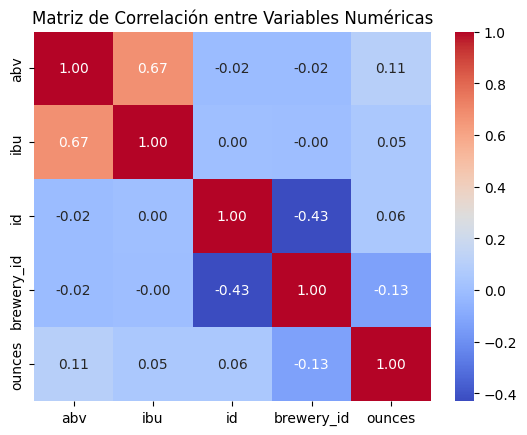

In [31]:
birras_datos=birras.select_dtypes(include='number')
matriz_correlacion=birras_datos.dropna().corr()

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

#Cuanto mas cerca del 1 mas correlacion tiene, aunque sea en negativo. Esto es, cerca del -1 tamb

<Axes: xlabel='abv', ylabel='ibu'>

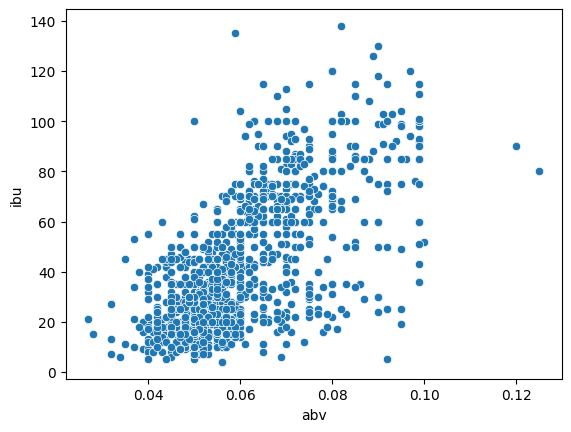

In [34]:
#Vemos que existe alguna relacion entre las variables abv y ibu
#Por lo tanto graficare una grafica de correlacion entre las dos variables
sns.scatterplot(x=birras['abv'],y=birras['ibu'])


<Axes: xlabel='id', ylabel='brewery_id'>

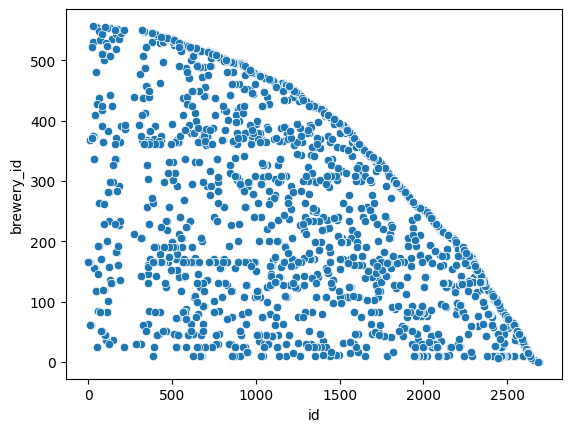

In [36]:
sns.scatterplot(x=birras['id'],y=birras['brewery_id']) #Existe una relacion pero obviamente no es lineal


## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

**Histogramas**

Util para ver la forma, dispersión y tendencia central de datos.

<Axes: >

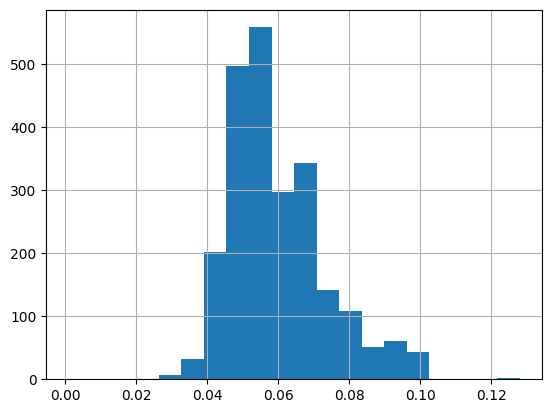

In [42]:
birras['abv'].hist(bins=20) #Usando pandas

<Axes: xlabel='abv', ylabel='Count'>

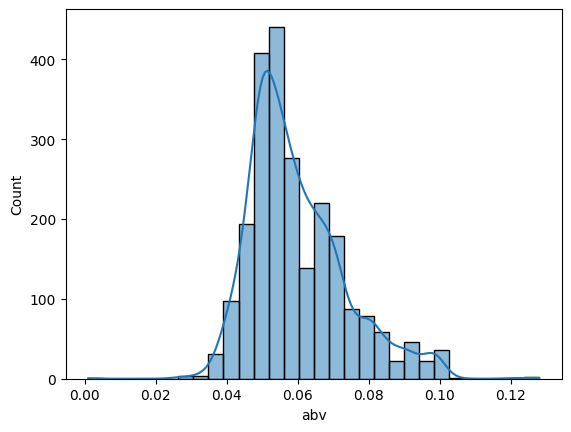

In [33]:
sns.histplot(birras['abv'],bins=30,kde=True)  #kde es para dibujar la campana

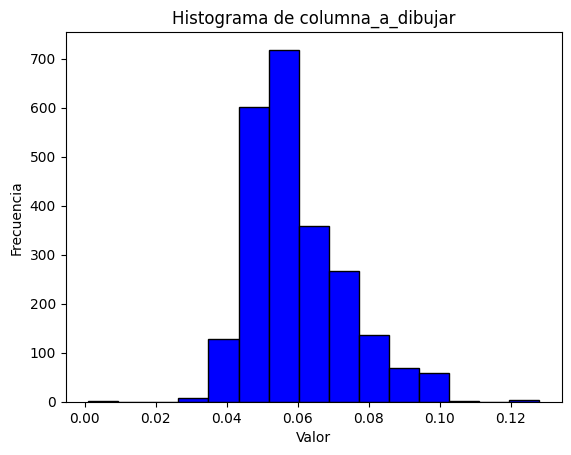

In [45]:
# Dibuja el histograma. Libreria matplotlib.
plt.hist(birras['abv'], bins=15, color='blue', edgecolor='black')

# Añade etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de columna_a_dibujar')

# Muestra el histograma
plt.show()

- Visualmente no es una distribucion simetrica
- Calcula la media y la mediana de los datos. En una distribución simétrica, la media y la mediana deberían ser aproximadamente iguales. Si la media está a la derecha de la mediana, podría indicar asimetría positiva, y si está a la izquierda, podría indicar asimetría negativa.

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

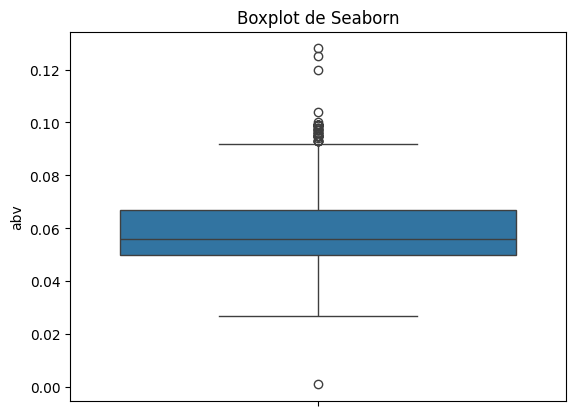

In [47]:
sns.boxplot(y='abv', data=birras)
plt.title('Boxplot de Seaborn')
plt.show()

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [51]:
#Estilos que tienen en media mas alcohol. Ordenados de mayor a menor.
birras.groupby('style')['abv'].mean().sort_values(ascending=False)

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
                            ...   
Berliner Weissbier        0.043909
English Dark Mild Ale     0.041500
Light Lager               0.040417
Radler                    0.040333
Low Alcohol Beer          0.001000
Name: abv, Length: 99, dtype: float64

In [52]:
#Estilos de media mas amargos
birras.groupby('style')['ibu'].mean().sort_values(ascending=False)

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
                                      ...  
Kristalweizen                           NaN
Low Alcohol Beer                        NaN
Mead                                    NaN
Rauchbier                               NaN
Shandy                                  NaN
Name: ibu, Length: 99, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [36]:
birras_2=pd.read_csv('./data/datasets_breweries.csv')

Información básica del nuevo dataset:

In [54]:
birras_2.shape

(558, 4)

In [55]:
birras_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [63]:
birras_2.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [37]:
birras_2.rename(columns={'Unnamed: 0':'brewery_id','name':'brewery_name'},inplace=True)
birras_2

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [38]:
display('birras.head()','birras_2.head()')

birras.head()
     abv  ibu    id                 name                           style  \
0  0.050  NaN  1436             Pub Beer             American Pale Lager   
1  0.066  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN  2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces  
0         408    12.0  
1         177    12.0  
2         177    12.0  
3         177    12.0  
4         177    12.0  

birras_2.head()
   brewery_id               brewery_name           city state
0           0         NorthGate Brewing     Minneapolis    MN
1           1  Against the Grain Brewery     Louisville    KY
2           2   Jack's Abby Craft Lagers     Framingham    MA
3           3  Mike Hess Brewing Company      San Diego    CA
4           4    Fort Point Beer Company  San Francisco    CA

In [42]:
birras_completo=pd.merge(birras,birras_2, on='brewery_id')
birras_completo

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [44]:
birras_completo=pd.merge(birras,birras_2)
birras_completo

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

Número de estados diferentes:

In [45]:
len(birras_2['state'].unique())

51

Número de ciudades diferentes:

In [46]:
len(birras_2['city'].unique())

384

Número de cervecerias:

In [47]:
len(birras_2['brewery_name'].unique())

551

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [100]:
birras_completo

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [98]:
birras_completo.groupby(['state','city'])['abv'].aggregate(['mean','median','max'])

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [101]:
birras_completo

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [48]:
birras_completo.groupby('state').get_group(' IN') #

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2195,0.045,35.0,948,Circuit Bohemian Pilsner,Czech Pilsener,17,16.0,Tin Man Brewing Company,Evansville,IN
2275,0.045,50.0,2190,Campside Session IPA,American IPA,202,16.0,Upland Brewing Company,Bloomington,IN
2276,0.045,15.0,1951,Upland Wheat Ale,Witbier,202,16.0,Upland Brewing Company,Bloomington,IN
2277,0.060,NaN,1950,Dragonfly IPA,American IPA,202,16.0,Upland Brewing Company,Bloomington,IN


In [50]:
birras_completo.groupby('state').get_group(' IN')['ibu'].sort_values(ascending=False)

479     115.0
2191    115.0
811     104.0
2062     91.0
2189     90.0
        ...  
2056      NaN
2061      NaN
2190      NaN
2277      NaN
2329      NaN
Name: ibu, Length: 139, dtype: float64

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [135]:
birras_completo.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [65]:
#ESTA ES LA SOLUCION CORRECTA MIRAR. NO MANDAN LAS CERVEZAS MANDAS LAS CERVECERIA
list=birras_completo.loc[birras_completo['abv']>=0.07,'brewery_name'].unique() #Valores unicos de las cervecerias
mask=birras_completo['brewery_name'].isin(list)
birras_completo[mask]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [56]:
birras_completo[birras_completo['abv']>=0.07][['abv','name']]

,abv,name
2,0.071,Rise of the Phoenix
3,0.090,Sinister
4,0.075,Sex and Candy
5,0.077,Black Exodus
9,0.086,Cone Crusher
...,...,...
2380,0.080,P-51 Porter
2382,0.071,#002 American I.P.A.
2398,0.077,Lights Out Vanilla Cream Extra Stout
2402,0.082,Colorojo Imperial Red Ale


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [66]:
media_completa=birras_completo['ibu'].mean()

In [67]:
df_24=birras_completo.groupby('state', as_index=False)['ibu'].mean() #Dataframe con estado y media de ibu
df_24.head()

,state,ibu
0,AK,40.882353
1,AL,51.222222
2,AR,39.000000
3,AZ,35.208333
4,CA,46.281481


In [68]:
df_24[df_24['ibu']>media_completa]

,state,ibu
1,AL,51.222222
4,CA,46.281481
5,CO,47.431507
7,DC,55.250000
8,DE,52.000000
9,FL,46.756757
10,GA,46.285714
13,ID,55.117647
15,IN,42.989011
21,ME,52.857143
